# PRiAD 3 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD3, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format

> **Zadanie 1** Napisz funkcję zliczającą brakujące dane w ramce będącej jej argumentem. Funkcja powinna zwracać dwie listy (lub wektory albo słowniki) - pierwsza zawierające liczby braków w kolejnych obiektach (wiersze), druga dla kolejnych atrybutów (kolumny). Oprócz kodu funkcji napisz kod testujący jej działanie.

In [167]:
def count_nulls(df):
    row_nulls = df.isnull().sum(axis=1).tolist()
    column_nulls = df.isnull().sum(axis=0).tolist()
    return row_nulls, column_nulls

df = pd.DataFrame(np.random.randn(6,5), columns = list('PRIAD'))
df.iloc[3,0] = np.nan
df.iloc[3,3] = np.nan
df.iloc[4,2] = np.nan
df.iloc[4,3] = np.nan
df.iloc[1,2] = np.nan
df.iloc[2,3] = np.nan

r, c = count_nulls(df)
correct_answer_row = [0,1,1,2,2,0]
correct_answer_column = [1,0,2,3,0]
if (r == correct_answer_row and c == correct_answer_column):
    print("It works!")
else:
    print("Oh no:(")

It works!


> **Zadanie 2** W pliku `pasazerowie_lot.xls` zawarte są dane o liczbie pasażerów samolotów w latach 2005-16 w państwach należących do Unii Europejskiej oraz z nią stowarzyszonych. Dane pochodzą z [serwisu internetowego EUROSTAT-u](http://ec.europa.eu/eurostat/data/database). Wykonaj następujące zadania:
* wczytaj plik 
* zastanów się, jaka jest najwygodniesza postać ramki danych do dalszego przetwarzania - przekształć dane do tej postaci
* usuń wszystkie obiekty, w których występuje choć jeden brak
* narysuj wykres słupkowy pokazujący łączną liczbę przewiezionych pasażerów z podziałem na lata, słupki powinny być posortowane od najkrótszego (najmniej pasażerów), do najdłuższego (najwięcej przewiezionych pasażerów)

[Text(0.5, 0, 'Number of passengers')]

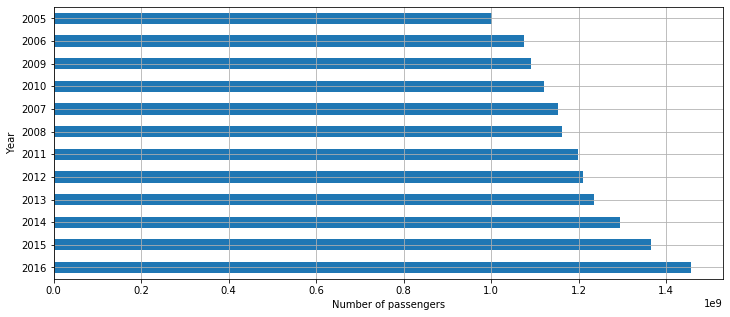

In [4]:
data = pd.read_excel('pasazerowie_lot.xls', index_col = 0, header = 2)
data = data.dropna().astype(int)
data.index.name = 'Country'
data.columns.name = 'Year'
data_calculated = data.sum(axis=0).sort_values(ascending = False)
gr = data_calculated.plot.barh(figsize=(12,5), grid='true')
gr.set(xlabel = 'Number of passengers')
#data_calculated.plot(figsize=(12,5),kind='barh')

> **Zadanie 3** Znajdź w danych z pliku `pasazerowie_lot.xls` państwa o:
* największym i najmniejszym bezwzględnym przyroście liczby pasażerów w całym obserwowanym okresie
* największym i najmniejszym względnym przyroście liczby pasażerów w całym obserwowanym okresie
* lata o największym i najmniejszym przyroście liczby pasażerów w Polsce
* lata o największym i najmniejszym przyroście liczby pasażerów we wszystkich obserwowanych państwach
* zastanów się każdorazowo nad możliwymi iterpretacjami wyników

In [11]:
data = pd.read_excel('pasazerowie_lot.xls', index_col = 0, header = 2)
data = data.dropna().astype(int)
df = data.diff(axis=1).T
dff = data.sum().diff()
first_year = data['2005']
last_year = data['2016']
difference = last_year - first_year
print("Największy przyrost bezwzględny liczby pasażerów w okresie 2005-2016 ma: " + difference.idxmax() + " --- " + str(difference.max()))
print("Najmniejszy przyrost względny liczby pasażerów w okresie 2005-2016 ma: " + difference.idxmin() + " --- " + str(difference.min()))
print("Największy przyrost bezwzględny liczby pasażerów w okresie 2005-2016 ma: " + (difference/first_year*100).idxmax() + " --- " + str(round((difference/first_year*100).max(),2)) + "%")
print("Najmniejszy przyrost względny liczby pasażerów w okresie 2005-2016 ma: " + (difference/first_year*100).idxmin() + " --- " + str(round((difference/first_year*100).min(),2)) + "%")
print('Największy wzrost w Polsce: ' + str(int(df['Poland'].max())) + ' w roku: ' + df['Poland'].idxmax())
print('Najmniejszy wzrost w Polsce: '  + str(int(df['Poland'].min())) + ' w roku: ' + df['Poland'].idxmin())
print('Największy wzrost w sumie we wszystkich krajach: ' + str(int(dff.max())) + ', w roku ' + dff.idxmax())
print('Najmniejszy wzrost w sumie we wszystkich krajach: ' + str(int(dff.min())) + ', w roku ' + dff.idxmin())

#liczone metodą "rzemieślniczą", zanim poznałem wykorzystaną wcześniej opcję diff
data['biggest_growth'] = data['2006'] - data['2005']
data['biggest_growth_year'] = '2006'
data['lowest_growth'] = data['2006'] - data['2005']
data['lowest_growth_year'] = '2006'
for i in data.iloc[:,1:11]:
    difference = data[str(int(i) + 1)] - data[i]
    for j in data.index:
        if difference.loc[j] > data['biggest_growth'].loc[j]:
            data.loc[j,'biggest_growth'] = difference.loc[j]
            data.loc[j,'biggest_growth_year'] = str(int(i) + 1)
        if difference.loc[j] < data['lowest_growth'].loc[j]:
            data.loc[j,'lowest_growth'] = difference.loc[j]
            data.loc[j,'lowest_growth_year'] = str(int(i) + 1)
print("Największe i najmniejsze roczne przyrosty ze wskazaniem roku dla poszczególnych krajów opisują 4 ostatnie kolumny:")
data

Największy przyrost bezwzględny liczby pasażerów w okresie 2005-2016 ma: Germany --- 54584814
Najmniejszy przyrost względny liczby pasażerów w okresie 2005-2016 ma: Slovenia --- 186985
Największy przyrost bezwzględny liczby pasażerów w okresie 2005-2016 ma: Poland --- 355.72%
Najmniejszy przyrost względny liczby pasażerów w okresie 2005-2016 ma: Slovenia --- 15.36%
Największy wzrost w Polsce: 6657478 w roku: 2006
Najmniejszy wzrost w Polsce: -1680466 w roku: 2009
Największy wzrost w sumie we wszystkich krajach: 92011467, w roku 2016
Najmniejszy wzrost w sumie we wszystkich krajach: -70627206, w roku 2009
Największe i najmniejsze roczne przyrosty ze wskazaniem roku dla poszczególnych krajów opisują 4 ostatnie kolumny:


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,biggest_growth,biggest_growth_year,lowest_growth,lowest_growth_year
geo\time,,,,,,,,,,,,,,,,
Belgium,17813943,19154673,20805455,21983683,21316690,22697764,25102695,25919515,26389927,28776258,30958841,30115832,2404931,2011,-843009,2016
Czech Republic,11265764,12171235,13098141,13429149,12367467,12242386,12650532,11742352,11891812,12079873,12672004,13672362,1000358,2016,-1061682,2009
Denmark,22173770,22967560,24043172,24639072,22277524,24334852,25808694,26533265,27459709,29015810,30095505,32763142,2667637,2016,-2361548,2009
Germany,146102479,154090077,163784893,165758846,158148829,166130833,175316076,178591103,180783188,186445814,193936430,200687293,9694816,2007,-7610017,2009
Estonia,1393105,1533132,1722505,1804430,1341294,1381062,1907569,2202427,1958565,2019806,2160978,2214989,526507,2011,-463136,2009
Ireland,24254298,27558133,29840020,30018287,26268887,23094210,23362889,23594089,24603640,26310826,29545020,32595709,3303835,2006,-3749400,2009
Greece,30798527,32762340,35567225,35059804,33440269,32588072,33770739,32082336,34023934,39117833,42096402,45543371,5093899,2014,-1688403,2012
Spain,143679871,150599291,163523010,161400952,148318298,153387014,165153230,159771261,157731973,165354382,174652503,193872037,19219534,2016,-13082654,2009
France,107964706,113189378,120037222,122960315,117636389,118697207,126013257,129764462,132762875,136360671,140867569,145257114,7316050,2011,-5323926,2009


> **Zadanie 4** Wczytaj dane dowolnego z dwóch plików zawierających kursy walut. Wykorzystujac miary tendencji centralnej oraz miary rozrzutu określ dla każdej waluty w którym półroczu którego roku (rozważ jedynie półrocza, dla których znane są wszystkie kursy) kurs był najwyższy, najniższy (biorąc pod uwagę jego wartość średnią w danym okresie) oraz wykazywał największą zmienność.

In [13]:
cur = pd.read_excel('waluty1.xls')
cur = cur.dropna()
cur['półrocze'] = 0
for i in cur.index:
    if cur.loc[i]['mies'] > 6:
        cur.at[i,'półrocze'] = 2
    else:
        cur.at[i,'półrocze'] = 1
gr = cur.drop(columns = ['dzien','mies']).groupby(['rok','półrocze'])
gr_mean = gr.mean()
max_index = gr_mean.idxmax()
#print(max_index)
max_value = gr_mean.max()
min_index = gr_mean.idxmin()
min_value = gr_mean.min()
print("Maksymalne kursy określonych walut osiagnieto w (rok,półrocze):")
max_df = pd.concat([max_index, max_value], axis = 1)
max_df.columns = ['Rok, półrocze','kurs']
print(max_df)
print("\nMinimalne kursy określonych walut osiagnieto w (rok,półrocze):")
min_df = pd.concat([min_index, min_value], axis = 1)
min_df.columns = ['Rok, półrocze','kurs']
print(min_df)
gmin = gr.min()
gmax = gr.max()
spread = gmax - gmin
spread_index = spread.idxmax()
spread_value = spread.max()
spread_df = pd.concat([spread_index, spread_value], axis = 1)
print("\nNajwiększą zmienność kursów walut osiagnieto w (rok,półrocze):")
spread_df.columns = ['Rok, półrocze','spread']
print(spread_df)

CHF    (2010, 2)
USD    (2009, 1)
EUR    (2009, 1)
JPY    (2010, 2)
dtype: object
Maksymalne kursy określonych walut osiagnieto w (rok,półrocze):
    Rok, półrocze  kurs
CHF     (2010, 2)  3.01
USD     (2009, 1)  3.36
EUR     (2009, 1)  4.47
JPY     (2010, 2)  3.61

Minimalne kursy określonych walut osiagnieto w (rok,półrocze):
    Rok, półrocze  kurs
CHF     (2008, 1)  2.18
USD     (2008, 1)  2.29
EUR     (2008, 1)  3.49
JPY     (2008, 1)  2.18

Największą zmienność kursów walut osiagnieto w (rok,półrocze):
    Rok, półrocze  spread
CHF     (2008, 2)    0.84
USD     (2008, 2)    1.11
EUR     (2009, 1)    0.98
JPY     (2008, 2)    1.47


>**Zadanie 5** Napisz kod umożliwiający ocenę stopnia korelacji kursów walut (z dowolnego źródła danych) w poszczególnych latach oraz w całym okresie dla którego dane są dostępne. Które waluty były skorelowane najmocniej, a które najsłabiej? O czym może świadczyć korelacja kursów dwóch walut?

In [171]:
# Miejsce na kod
cur = pd.read_excel('waluty1.xls')
cur = cur.drop(["dzien","mies"], axis = 1)
gr = cur.groupby('rok')
year_corr = gr.corr()
cur_without_date = cur.drop(columns = 'rok')
entire_corr = cur_without_date.corr()
print('Współczynniki korelacji dla poszczególnych lat:')
print(year_corr)
print('\nWspółczynniki korelacji dla całego okresu:')
print(entire_corr)
print("\nTablica średnich korelacji waluta-waluta w latach 2006-2010:")
print(year_corr.mean(level = 1))
print("\nKiedy wystąpiły najsilniejsze korelacje dla danej waluty i z jaką walutą była to korelacja:")
print(year_corr[year_corr < 1].idxmax())

Współczynniki korelacji dla poszczególnych lat:
          CHF  USD  EUR  JPY
rok                         
2006 CHF 1.00 0.62 0.92 0.77
     USD 0.62 1.00 0.46 0.86
     EUR 0.92 0.46 1.00 0.53
     JPY 0.77 0.86 0.53 1.00
2007 CHF 1.00 0.95 0.97 0.96
     USD 0.95 1.00 0.97 0.87
     EUR 0.97 0.97 1.00 0.90
     JPY 0.96 0.87 0.90 1.00
2008 CHF 1.00 0.93 0.96 0.96
     USD 0.93 1.00 0.88 0.98
     EUR 0.96 0.88 1.00 0.91
     JPY 0.96 0.98 0.91 1.00
2009 CHF 1.00 0.93 0.98 0.88
     USD 0.93 1.00 0.92 0.91
     EUR 0.98 0.92 1.00 0.83
     JPY 0.88 0.91 0.83 1.00
2010 CHF 1.00 0.73 0.51 0.92
     USD 0.73 1.00 0.67 0.88
     EUR 0.51 0.67 1.00 0.57
     JPY 0.92 0.88 0.57 1.00

Współczynniki korelacji dla całego okresu:
     CHF  USD  EUR  JPY
CHF 1.00 0.80 0.90 0.97
USD 0.80 1.00 0.85 0.78
EUR 0.90 0.85 1.00 0.84
JPY 0.97 0.78 0.84 1.00

Tablica średnich korelacji waluta-waluta w latach 2006-2010:
     CHF  USD  EUR  JPY
CHF 1.00 0.83 0.87 0.90
USD 0.83 1.00 0.78 0.90
EUR 0.87 0.78 1.

Na podstawie współczynników korelacji jesteśmy w stanie stwierdzić jak silnie zależne są od siebie waluty. Po analizie powyższych danych widać, że najsilniej powiązane są pary JPY-CHF oraz JPY-USD. Najsłabiej za to były skorelowane EUR z JPY (0.75) oraz EUR z USD(0.78).

> **Zadanie 6** Zmień nazwę tego skryptu na następującą "PRiAD3_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.